In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data

from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), (test_images, test_labels) = load_data(path="D:/Jupyter/GitHub_BEng_Project/mnist_datasets/mnist.npz")

In [2]:
# zero-pad to meet the input shape's requirement of LeNet
train_images = np.pad(train_images,((0,0),(2,2),(2,2)),'constant')
test_images = np.pad(test_images,((0,0),(2,2),(2,2)),'constant')

# add the channel
train_images = np.expand_dims(train_images,axis=3)
test_images = np.expand_dims(test_images,axis=3)

In [3]:
# LeNet-5 Model Set Up
LeNet = keras.Sequential(name='LeNet-5')
LeNet.add(layers.Conv2D(6,kernel_size=(5,5),activation='sigmoid',name='C1',input_shape=(32,32,1)))
LeNet.add(layers.MaxPooling2D(pool_size=(2,2),name='S2'))
LeNet.add(layers.Conv2D(16,kernel_size=(5,5),activation='sigmoid',name='C3'))
LeNet.add(layers.MaxPooling2D(pool_size=(2,2),name='S4'))

# LeNet.add(layers.Flatten())
# LeNet.add(layers.Dense(120,activation='sigmoid',name='F5'))
LeNet.add(layers.Conv2D(120,kernel_size=(5,5),activation='sigmoid',name='C5'))
LeNet.add(layers.Flatten(name='C5_F6_Connection'))

LeNet.add(layers.Dense(84,activation='sigmoid',name='F6'))
LeNet.add(layers.Dense(10,activation='softmax',name='Output_Layer'))

LeNet.summary()

Model: "LeNet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S2 (MaxPooling2D)            (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (MaxPooling2D)            (None, 5, 5, 16)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 1, 1, 120)         48120     
_________________________________________________________________
C5_F6_Connection (Flatten)   (None, 120)               0         
_________________________________________________________________
F6 (Dense)                   (None, 84)                1016

In [4]:
# Train the model
LeNet.compile(loss=keras.losses.sparse_categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy']
             )

history = LeNet.fit(x=train_images, y=train_labels,
          verbose=1, epochs=20,
          validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 299us/sample - loss: 0.4975 - accuracy: 0.8528 - val_loss: 0.1027 - val_accuracy: 0.9682
Epoch 2/20
60000/60000 [==============================] - 15s 246us/sample - loss: 0.0943 - accuracy: 0.9711 - val_loss: 0.0826 - val_accuracy: 0.9747
Epoch 3/20
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0683 - accuracy: 0.9792 - val_loss: 0.0627 - val_accuracy: 0.9790
Epoch 4/20
60000/60000 [==============================] - 14s 240us/sample - loss: 0.0561 - accuracy: 0.9823 - val_loss: 0.0539 - val_accuracy: 0.9828
Epoch 5/20
60000/60000 [==============================] - 15s 247us/sample - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.0473 - val_accuracy: 0.9849
Epoch 6/20
60000/60000 [==============================] - 14s 241us/sample - loss: 0.0409 - accuracy: 0.9868 - val_loss: 0.0421 - val_accuracy: 0.9852
Epoch 7/20
60000/60000 [====================

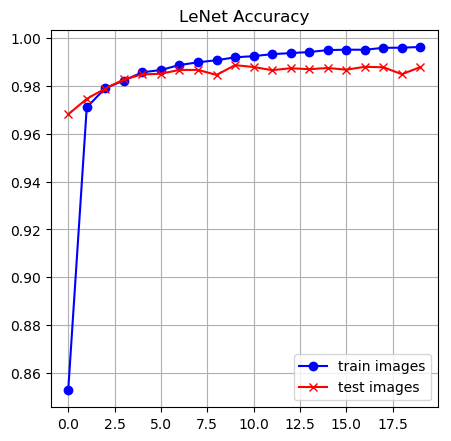

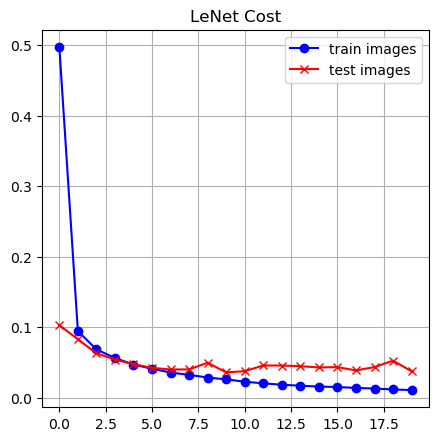

In [24]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss =  history.history['val_loss']
val_acc = history.history['val_accuracy']

epoches = range(len(loss))


plt.figure(num=0,figsize=(5,5),dpi=100)
train_acc,=plt.plot(epoches, acc, 'b-o')
test_acc,=plt.plot(epoches, val_acc, 'r-x')
plt.grid(True)
plt.legend(['train images','test images'])
plt.title('LeNet Accuracy')
plt.savefig('./LeNet_Acc')


plt.figure(num=1,figsize=(5,5),dpi=100)
train_loss,=plt.plot(epoches, loss, 'b-o')
test_loss,=plt.plot(epoches, val_loss, 'r-x')
plt.grid(True)
plt.legend(['train images','test images'])
plt.title('LeNet Cost')
plt.savefig('./LeNet_Loss')

plt.show()
